### 문제이름
여행경로

### 링크
https://school.programmers.co.kr/learn/courses/30/lessons/43164

### 예시 코드
tickets	|return
|---|---|
[["ICN", "JFK"], ["HND", "IAD"], ["JFK", "HND"]]	|["ICN", "JFK", "HND", "IAD"]
[["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]	|["ICN", "ATL", "ICN", "SFO", "ATL", "SFO"]

1번재 시도 - 실패

In [32]:
def solution(tickets):
    answer = ["ICN"] # 가능한 경로들을 저장할 리스트 (가능한 경로가 2개 이상일 수 있다)
    visited = [True] * len(tickets)
    # 1. 알파벳 순으로 정렬하기
    tickets.sort(key = lambda x: (x[0], x[1]))
    
    while any(visited):
        for n, ticket in enumerate(tickets):
            if (answer[-1] == ticket[0]) and (visited[n]):
                answer.append(tickets[n][1])
                visited[n] = False
                break
    return answer

solution([["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]) 

['ICN', 'ATL', 'ICN', 'SFO', 'ATL', 'SFO']

정답 : DFS 방법 - 스택

In [34]:
from collections import defaultdict

def solution(tickets):
    t_dict = defaultdict(list)
    
    # key: 출발지, value: 목적지인 딕셔너리 만듦
    for s, e in tickets:
        t_dict[s].append(e)
    
    # 목적지 기준 내림차순 정렬(맨 오른쪽걸 pop해서 쓸거임. 알파벳 순서 상 가장 앞선 것)
    for t_key in t_dict.keys():
        t_dict[t_key].sort(reverse = True)
        
    answer = []
    path = ["ICN"]       
    
    while path: # 빈 리스트가 되면 멈춤
        now = path[-1]
        
        if (now not in t_dict) or (len(t_dict[now]) == 0): # 끝나는 지점이라 출발점에 없거나, 출발점에 있지만 다음 목적지 티켓이 없으면 완료된 것으로 path의 마지막 위치를 추가한다.
            answer.append(path.pop())
        else: # 티켓이 있으면, 삭제와 동시에 경로에 넣기
            path.append(t_dict[now].pop())
            
    return answer[::-1]

solution([["ICN", "SFO"], ["ICN", "ATL"], ["SFO", "ATL"], ["ATL", "ICN"], ["ATL","SFO"]]) 

['ICN', 'ATL', 'ICN', 'SFO', 'ATL', 'SFO']

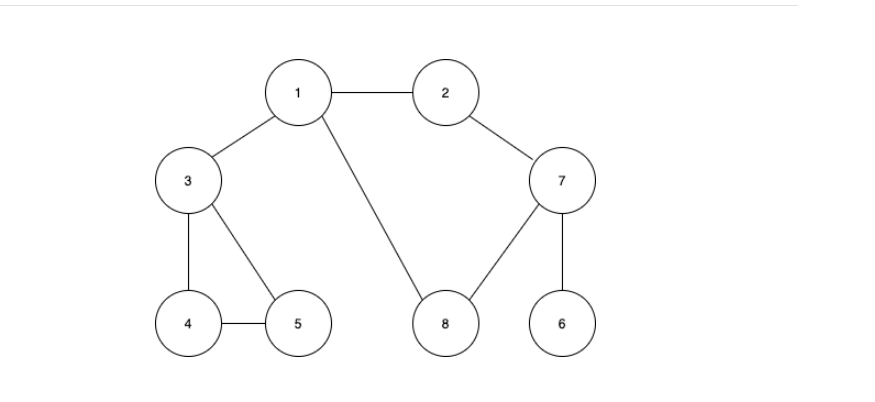  
DFS 알고리즘은 stack(스택)자료구조를 활용하여 깊이 우선 탐색을 한다. 구체적인 동작 과정은 다음과 같다.

1. 탐색 시작 노드를 스택에 삽입한다.  
2. 아래 과정을 스택이 빌 때 까지 반복한다.  
    - 스택에서 노드를 꺼낸다.(pop)  
    - 이미 방문한 노드이면 skip, 아니면 방문 처리하고 모든 인접노드를 스택에 삽입한다.(push)  

DFS는 이론상 위 처럼 스택 자료구조를 활용한다. 하지만 실제로 코드로 구현할 때는 재귀함수(recursion)을 통해 구현할 수 있다. 재귀함수의 동작 원리가 스택과 같기 때문에 재귀함수를 활용해 심플하게 구현할 수 있다.

In [17]:
# DFS 메서드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end = ' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i ,visited) # 재귀적으로 호출

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

#정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 